In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 安装最新版本Keras
# https://keras.io/
#!pip install keras
#最新版 keras==2.3.0 2020.06.27
# 指定版本安装
#!pip install keras==2.0.8
!pip install keras==2.1.5

%tensorflow_version 1.x
!pip install imgaug==0.2.5
!pip install gast==0.2.2

# 安装 OpenCV
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
# 安装 Pytorch
# http://pytorch.org/
!pip install --upgrade pip
!pip install folium==0.2.1
!pip install numpy --upgrade
!pip install torch==1.5.1
# 安装 XGBoost
# https://github.com/dmlc/xgboost
!pip install -q xgboost
# 安装 7Zip
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
# 安装 GraphViz 和 PyDot
!apt-get -qq install -y graphviz && pip install -q pydot

#import tensorflow
#print(tensorflow.__version__)

!pip install --upgrade pip
!pip install folium==0.2.1
!pip install numpy --upgrade
!pip install torch==1.5.1

import os
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Colab Notebooks/Mask_RCNN-master"
os.chdir(path)

!pip install -r requirements.txt

!python setup.py install

#path = "/content/drive/My Drive/Colab Notebooks/coco-master/PythonAPI"
#os.chdir(path)

#!make

     |████████████████████████████████| 337kB 2.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
TensorFlow 1.x selected.
     |████████████████████████████████| 563kB 2.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561439 sha256=87e1379fab6f5f25ab8b7474435a90a1d17a9b18e9681cdf0cfbfcfb69844dc7
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=7ab634bcc5a6f685fbc7a922a14979fcdffc301bff90e6f6b6b16ea27611ced8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.

     |████████████████████████████████| 753.2 MB 2.4 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

torchvision 0.7.0+cu101 requires torch==1.6.0, but you'll have torch 1.5.1 which is incompatible.
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |██

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import datetime
import skimage.draw

# Root directory of the project
ROOT_DIR = os.path.abspath("../../") 
#ROOT_DIR = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Mask_RCNN-master")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to dataset
dataset_dir = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Mask_RCNN-master/samples/footpath/footpath_dataset")

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to pre-trained weights file (transfer learning)
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Using TensorFlow backend.


## Configurations

In [ ]:
# Configurations
class FootpathConfig(Config):
    """Configuration for training on the footpath dataset.
    Derives from the base Config class and overrides values specific
    to the footpath dataset.
    """
    # Give the configuration a recognizable name
    NAME = "footpath"

    # Train on 1 GPU and 2 images per GPU.
    # Batch size is 2 (Batch size = GPU_COUNT * IMAGES_PER_GPU). 
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 2  # background + 2 classes

    # Use a small epoch since the data is simple
    # STEPS_PER_EPOCH = 100
    STEPS_PER_EPOCH = 6

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 2
	
	  # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
config = FootpathConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Dataset

In [ ]:
# Dataset 
class FootpathDataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """

    def load_footpath(self, dataset_dir, subset):
        """Load a subset of the Balloon dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. 
        self.add_class("footpath", 1, "footpath")
        self.add_class("footpath", 2, "highway")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator (up to version 1.6) saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region

        # Note: In VIA 2.0, regions was changed from a dict to a list.
        # VGG Image Annotator (up to version 2.0.10) saves each image in the form:
        # { 'filename': 'footpath_13.png',
        #   'size': 463211, 
        #   'regions': [
        #          {
        #           'shape_attributes': {
        #               'name': 'polygon'
        #               'all_points_x': [...],
        #               'all_points_y': [...]},
        #           'region_attributes': {'footpath': 'footpath'}}
        #           ... more regions ...
        #          ],
        #   'file_attributes': {}
        # }
        annotations = json.load(open(os.path.join(dataset_dir, "via_region_data.json")))
        annotations = list(annotations.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. These are stores in the
            # shape_attributes (see json format above)
            # VIA versions 2.x.
            polygons = [r['shape_attributes'] for r in a['regions']]
            names = [r['region_attributes']['footpath'] for r in a['regions']]         
            name_dict = {"footpath": 1, "highway": 2}
            name_ids = [name_dict[a] for a in names]

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "footpath",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                class_ids=name_ids)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a footpath dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "footpath":
            return super(self.__class__, self).load_mask(image_id)
        name_ids = image_info['class_ids']
        # print(name_ids)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        class_ids = np.array(name_ids, dtype=np.int32)

        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance.
        return mask.astype(np.bool), class_ids

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "footpath":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)
		

In [ ]:
# Training dataset
dataset_train = FootpathDataset()
dataset_train.load_footpath(dataset_dir, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = FootpathDataset()
dataset_val.load_footpath(dataset_dir, "val")
dataset_val.prepare()

## Create Model

In [ ]:
# Create Model
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)
print(model.keras_model.layers)
layers = model.keras_model.layers
#include_layers = ["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"] # need to read from file
include_layers = []
exclude_layers = [l.name for l in layers if l.name not in include_layers]
print(exclude_layers)
for layer_name in exclude_layers:
  print(layer_name)
# model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=exclude_layers)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
[<keras.engine.input_layer.InputLayer object at 0x7fbbdbc7bef0>, <keras.layers.convolutional.ZeroPadding2D object at 0x7fbbdb448fd0>, <keras.layers.convolutional.Conv2D object at 0x7fbbdb44e550>, <mrcnn.model.BatchNorm object at 0x7fbbdb44e7b8>, <keras.layers.core.Activation object at 0x7fbbdb44ed30>, <keras.layers.pooling.MaxPooling2D object at 0x7fbbdb461be0>, <keras.layers.convolutional.Conv2D object at 0x7fbbdb3fb6a0>, <mrcnn.model.BatchNorm object at 0x7fbbdb403fd0>, <keras.layers.core.Activation object at 0x7fbbdb40a828>, <keras.layers.convolutional.Conv2D object at 0x7fbbdb40f8d0>, <mrcnn.model.BatchNorm object at 0x7fbbdb4215c0>, <keras.layers.core.Activation object at 0x7fbbdb428828>, <keras.layers.convolutional.Conv2D object at 

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

## Training

Train in two stages:
1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass `layers='heads'` to the `train()` function.

2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass `layers="all` to train all layers.

In [ ]:
# Training
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
print("Training the head branches")
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=10, 
            layers='heads')

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
print("Fine-tuning all layers")
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=2, 
            layers="all")

Fine-tuning all layers

Starting at epoch 10. LR=0.0001

Checkpoint Path: /content/drive/My Drive/logs/footpath20200719T1130/mask_rcnn_footpath_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branc

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers 

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
# model_path = os.path.join(MODEL_DIR, "mask_rcnn_footpath.h5")
# model.keras_model.save_weights(model_path)

## Detection


In [ ]:
# Detection
class InferenceConfig(FootpathConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", config=inference_config, model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/My Drive/logs/footpath20200719T1130/mask_rcnn_footpath_0010.h5
Re-starting from epoch 10


original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
image_meta               shape: (15,)                 min:    0.00000  max: 1024.00000  float64
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   93.00000  max: 1021.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


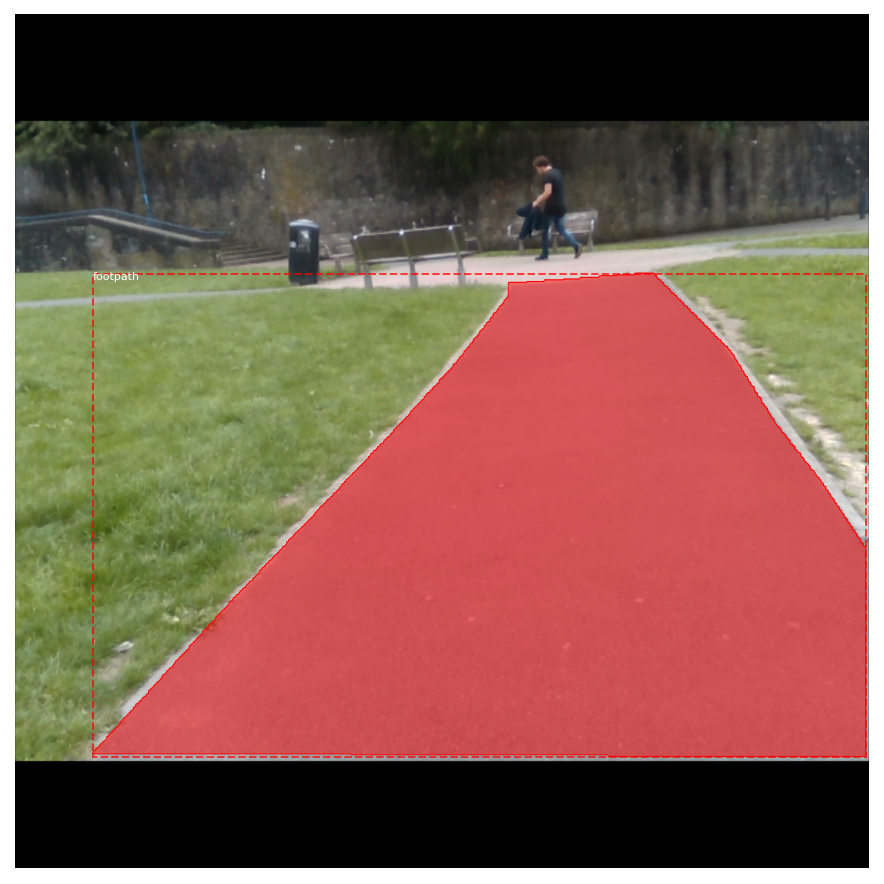

In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Display ground truth
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, dataset_train.class_names)


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


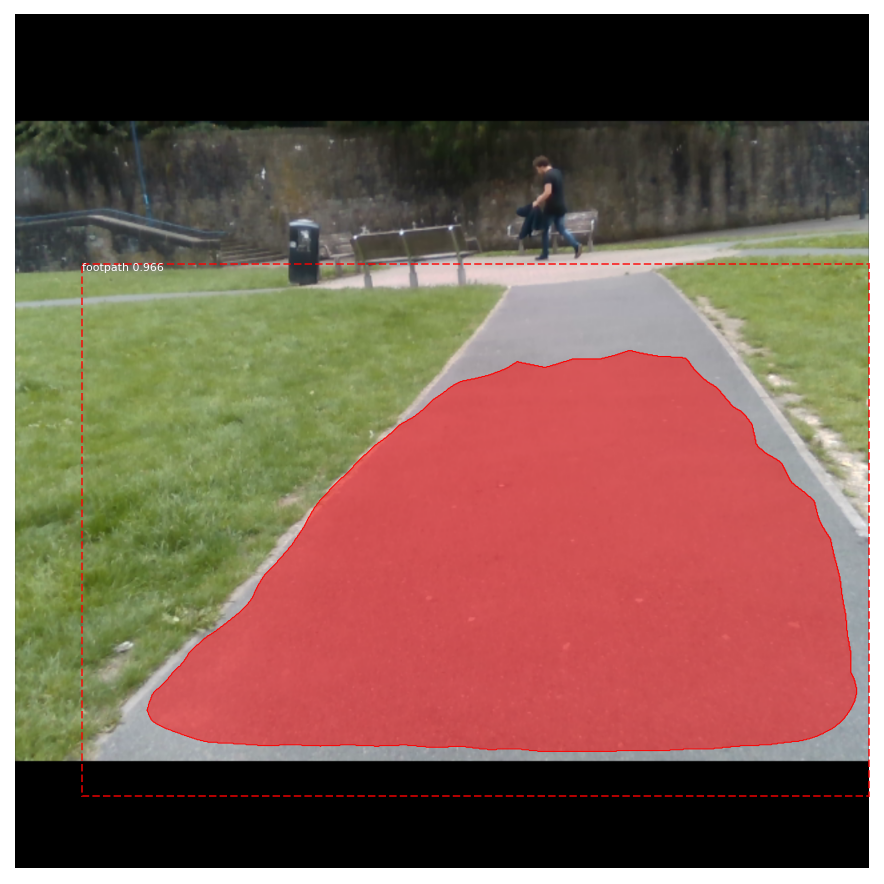

In [ ]:
# Prediction(detection) results
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'])


## Evaluation

In [ ]:
#Evaluation
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.7
